In [137]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### 1. Cleaned dataset w/o feat eng variables

#### a) Preparing the data

In [105]:
baseline_train_df = pd.read_csv("./data/train/baseline_train.csv")
baseline_val_df = pd.read_csv("./data/train/baseline_val.csv")
baseline_test_df = pd.read_csv("./data/test/baseline_test.csv")

In [106]:
X_train = np.array(baseline_train_df.drop("monthly_rent", axis=1))
y_train = np.array(baseline_train_df['monthly_rent'])
X_val = np.array(baseline_val_df.drop("monthly_rent", axis=1))
y_val = np.array(baseline_val_df['monthly_rent'])
X_test = np.array(baseline_test_df)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### b) Train the model

In [156]:
%%time 

model = LGBMRegressor(n_estimators=100, max_depth=16, n_jobs=16, learning_rate=0.2, subsample_for_bin=1000)
model.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 227
[LightGBM] [Info] Start training from score 2591.587963
CPU times: user 3.99 s, sys: 11.8 ms, total: 4 s
Wall time: 279 ms


LGBMRegressor(learning_rate=0.2, max_depth=16, n_jobs=16,
              subsample_for_bin=1000)

#### c) Test the model

In [157]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_rms = mean_squared_error(y_train, y_train_pred, squared=False)
val_rms = mean_squared_error(y_val, y_val_pred, squared=False)
print("Training RMS: {}".format(train_rms))
print("Validation RMS: {}".format(val_rms))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training RMS: 461.95300888309714
Validation RMS: 474.82747044194303


In [152]:
y_test_pred = model.predict(X_test)
test_df = pd.DataFrame(y_test_pred, columns=['Predicted'])
test_df.index.name = 'Id'
test_df.to_csv("test_prediction.csv")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


#### d) Feature importances

In [18]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = list(baseline_train_df.drop("monthly_rent", axis=1).columns)
model_importances = pd.Series(importances, index=feature_names)

In [19]:
topk = 10
topk_important_feature_indices = (-importances).argsort()[:topk]
topk_importances = np.sort(-importances)[:topk]
topk_important_features = np.array(feature_names)[topk_important_feature_indices]
topk_std = std[topk_important_feature_indices]

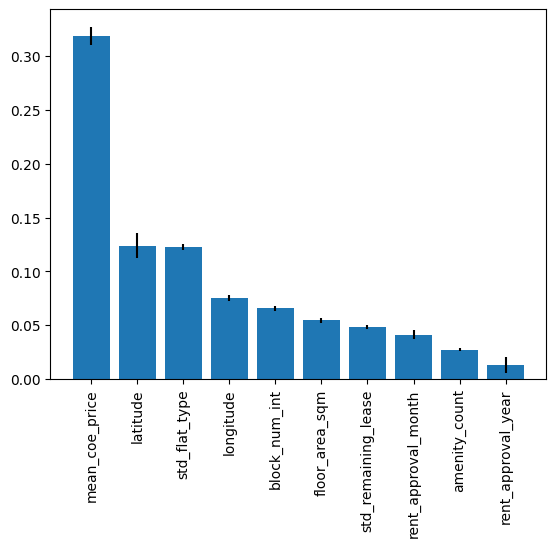

In [20]:
plt.bar(topk_important_features, -topk_importances, yerr=topk_std)
plt.xticks(rotation=90)
plt.show()

### 2. Cleaned dataset w/ feat eng variables

#### a) Preparing the data

In [84]:
baseline_train_df = pd.read_csv("./data/train/baseline_w_feature_eng_train.csv")
baseline_val_df = pd.read_csv("./data/train/baseline_w_feature_eng_val.csv")

In [85]:
X_train = np.array(baseline_train_df.drop("monthly_rent", axis=1))
y_train = np.array(baseline_train_df['monthly_rent'])
X_val = np.array(baseline_val_df.drop("monthly_rent", axis=1))
y_val = np.array(baseline_val_df['monthly_rent'])

#### b) Train the model

In [86]:
%%time 

# model = RandomForestRegressor(n_estimators=100, n_jobs=16)
model = LGBMRegressor(n_estimators=100, max_depth=16, n_jobs=16, learning_rate=0.2, random_state=33)
model.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1457
[LightGBM] [Info] Number of data points in the train set: 53983, number of used features: 222
[LightGBM] [Info] Start training from score 2591.707575
CPU times: user 3.67 s, sys: 28.1 ms, total: 3.7 s
Wall time: 305 ms


LGBMRegressor(learning_rate=0.2, max_depth=16, n_jobs=16, random_state=33)

#### c) Test the model

In [87]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_rms = mean_squared_error(y_train, y_train_pred, squared=False)
val_rms = mean_squared_error(y_val, y_val_pred, squared=False)
print("Training RMS: {}".format(train_rms))
print("Validation RMS: {}".format(val_rms))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training RMS: 459.38865607934434
Validation RMS: 476.604078919389


#### d) Feature importances

In [88]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = list(baseline_train_df.drop("monthly_rent", axis=1).columns)
model_importances = pd.Series(importances, index=feature_names)

AttributeError: 'LGBMRegressor' object has no attribute 'estimators_'

In [27]:
topk = 10
topk_important_feature_indices = (-importances).argsort()[:topk]
topk_importances = np.sort(-importances)[:topk]
topk_important_features = np.array(feature_names)[topk_important_feature_indices]
topk_std = std[topk_important_feature_indices]

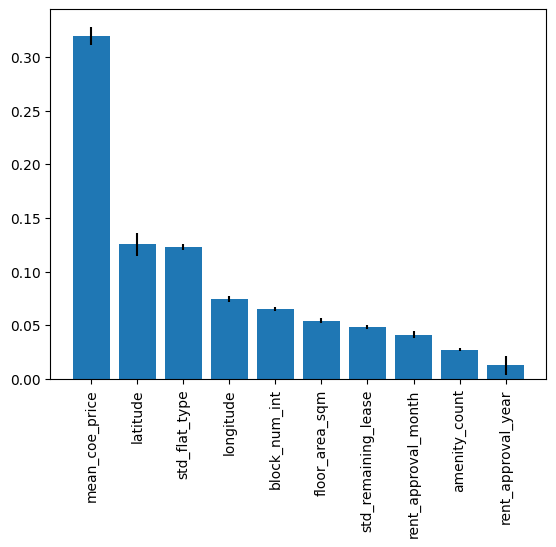

In [28]:
plt.bar(topk_important_features, -topk_importances, yerr=topk_std)
plt.xticks(rotation=90)
plt.show()

### 3. Cleaned dataset w/ feat eng variables but use price per sqm as label

#### a) Preparing the data

In [89]:
baseline_train_df = pd.read_csv("./data/train/baseline_w_feature_eng_train.csv")
baseline_val_df = pd.read_csv("./data/train/baseline_w_feature_eng_val.csv")

In [90]:
def add_label_as_monthly_rent_per_sqm(df):
    monthly_rent_per_sqm_list = []
    floor_area_sqm_list = list(df['floor_area_sqm'])
    monthly_rent_list = list(df['monthly_rent'])
    for i in range(len(monthly_rent_list)):
        monthly_rent_per_sqm_list.append(monthly_rent_list[i]/floor_area_sqm_list[i])
        
    df['monthly_rent_per_sqm_list'] = monthly_rent_per_sqm_list
    df = df.drop(['floor_area_sqm', 'monthly_rent'], axis=1)
    return df, floor_area_sqm_list, monthly_rent_list

In [91]:
baseline_train_df, baseline_train_floor_area_sqm_list, baseline_train_monthly_rent_list = add_label_as_monthly_rent_per_sqm(baseline_train_df)
baseline_val_df, baseline_val_floor_area_sqm_list, baseline_val_monthly_rent_list = add_label_as_monthly_rent_per_sqm(baseline_val_df)

In [93]:
X_train = np.array(baseline_train_df.drop("monthly_rent_per_sqm_list", axis=1))
y_train = np.array(baseline_train_df['monthly_rent_per_sqm_list'])
X_val = np.array(baseline_val_df.drop("monthly_rent_per_sqm_list", axis=1))
y_val = np.array(baseline_val_df['monthly_rent_per_sqm_list'])

#### b) Train the model

In [94]:
%%time 

model = LGBMRegressor(n_estimators=100, max_depth=16, n_jobs=16, learning_rate=0.2, random_state=33)
# model = RandomForestRegressor(n_estimators=100, n_jobs=16)
model.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 53983, number of used features: 221
[LightGBM] [Info] Start training from score 28.676378
CPU times: user 3.98 s, sys: 40.2 ms, total: 4.02 s
Wall time: 325 ms


LGBMRegressor(learning_rate=0.2, max_depth=16, n_jobs=16, random_state=33)

#### c) Test the model

In [95]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

for i in range(len(y_train_pred)):
    y_train_pred[i] = y_train_pred[i] * baseline_train_floor_area_sqm_list[i]
    
for i in range(len(y_val_pred)):
    y_val_pred[i] = y_val_pred[i] * baseline_val_floor_area_sqm_list[i]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [96]:
train_rms = mean_squared_error(baseline_train_monthly_rent_list, y_train_pred, squared=False)
val_rms = mean_squared_error(baseline_val_monthly_rent_list, y_val_pred, squared=False)
print("Training RMS: {}".format(train_rms))
print("Validation RMS: {}".format(val_rms))

Training RMS: 471.29353075226516
Validation RMS: 486.183276256084


#### d) Feature importances

In [36]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = list(baseline_train_df.drop("monthly_rent_per_sqm_list", axis=1).columns)
model_importances = pd.Series(importances, index=feature_names)

In [38]:
topk = 10
topk_important_feature_indices = (-importances).argsort()[:topk]
topk_importances = np.sort(-importances)[:topk]
topk_important_features = np.array(feature_names)[topk_important_feature_indices]
topk_std = std[topk_important_feature_indices]

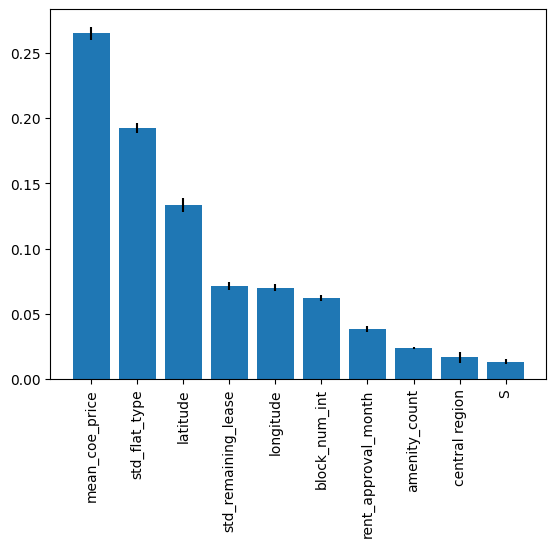

In [39]:
plt.bar(topk_important_features, -topk_importances, yerr=topk_std)
plt.xticks(rotation=90)
plt.show()